# Aprendizaje Automático (clase 3)

## Diego Fernando Agudelo 
## Universidad ICESI 
## diegoagudelo30@gmail.com

## **1. Carga de paquetes**

#!pip list | grep numpy
#!pip install "numpy==1.26.4"
#!pip install "pmdarima==2.0.4"
!pip install "pandas"
!pip install "statsmodels"
!pip install "scikit-learn"
!pip install "matplotlib"
!pip install "seaborn"
!pip install "openpyxl"


In [13]:
#!pip install "numpy==1.26.4"
#!pip install "pmdarima==2.0.4"

In [ ]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## **2. Carga de datos**

Vamos a usar unos datos simulados de un proceso ARIMA(0,1,1)

In [15]:
data = pd.read_csv("./arima011.csv")
data.head()

,time,ARIMA011
0,1,0.000000
1,2,1.177889
2,3,1.636159
3,4,1.095219
4,5,1.338308


## **3. ACF y PACF**

In [16]:
acf(data['ARIMA011'],40)

array([ 1.        ,  0.97067998,  0.936947  ,  0.90268173,  0.87006769,
        0.83930648,  0.80550412,  0.76900548,  0.729861  ,  0.69187304,
        0.65491402,  0.61463437,  0.5742899 ,  0.53486342,  0.4947723 ,
        0.45508868,  0.4193302 ,  0.38735224,  0.35741482,  0.3287006 ,
        0.29967955,  0.27332986,  0.25145635,  0.23117776,  0.20756429,
        0.18071305,  0.15605784,  0.1350231 ,  0.11849087,  0.10466391,
        0.08840871,  0.07087046,  0.05395363,  0.0389593 ,  0.02929347,
        0.02384452,  0.01739524,  0.00720187, -0.00414497, -0.0120686 ,
       -0.01886248])

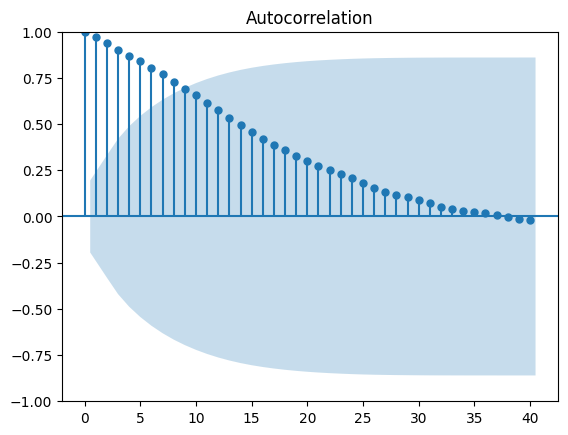

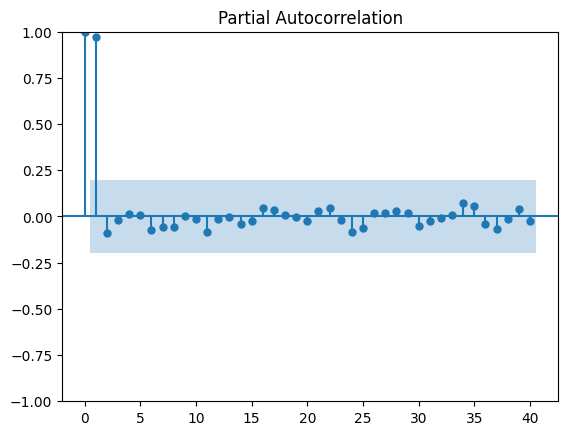

In [17]:
plot_acf(data['ARIMA011'],lags=40);
plot_pacf(data['ARIMA011'],lags=40);

In [18]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data["ARIMA011"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -152.348
Date:               mar, 11 nov. 2025   AIC                            310.695
Time:                        00:12:51   BIC                            318.511
Sample:                             0   HQIC                           313.858
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4366      0.207      2.105      0.035       0.030       0.843
ma.L1          0.8592      0.062     13.960      0.000       0.739       0.980
sigma2         1.2161      0.200      6.077      0.000       0.824       1.608
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.47   Prob(JB):                         0.50
Heteroskedasticity (H):               1.04   Skew:                            -0.16
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model.resid()

0     -0.436590
1      0.741300
2     -0.344742
3     -0.752029
4      0.355841
         ...   
96    -0.777039
97     1.984711
98    -1.015433
99    -0.738536
100   -0.133767
Length: 101, dtype: float64

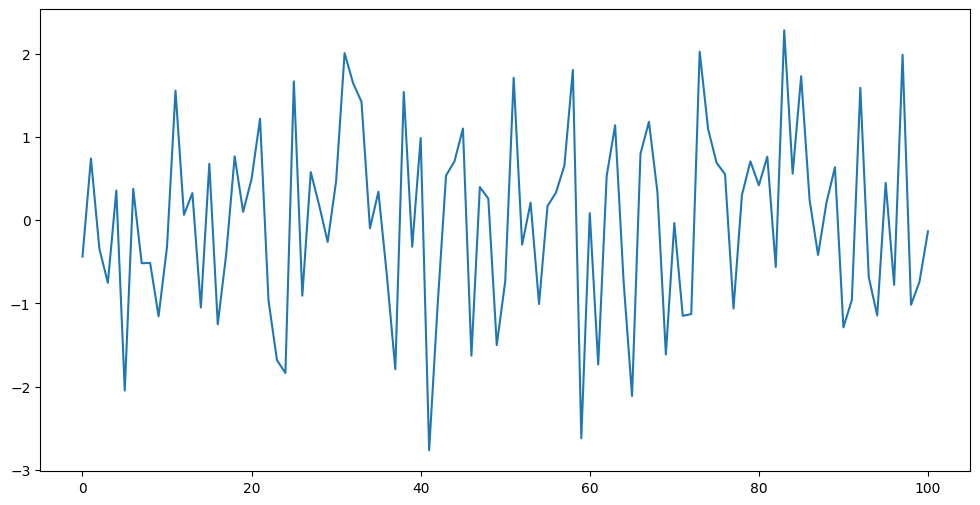

In [20]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid(),label="Residuales")

## **4. Pronóstico del ARIMA(0,1,1) obtenido en el auto.arima**


c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


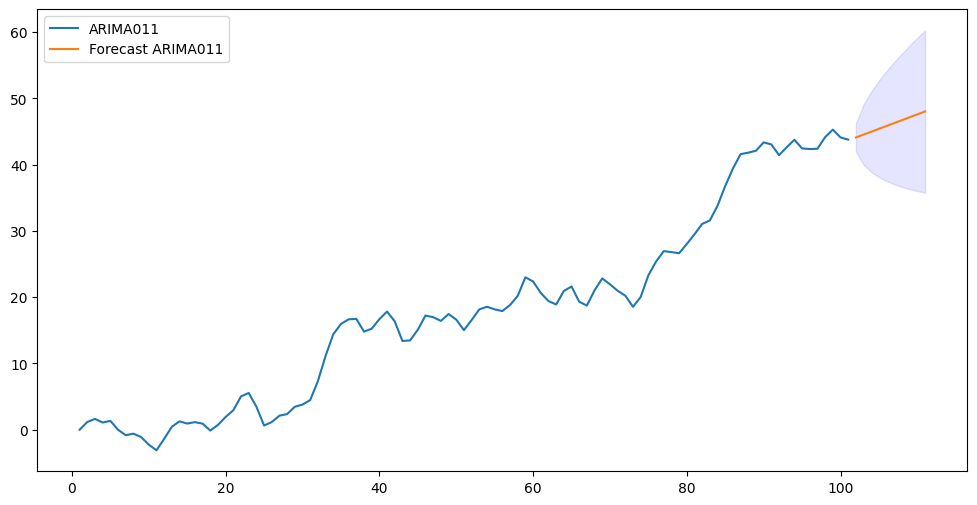

In [21]:
h=10

y_forec, conf_int  = model.predict(h,return_conf_int=True,alpha=0.05)
preds = pd.DataFrame(np.column_stack([y_forec,conf_int[:,0] , conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(data["time"],data["ARIMA011"],label="ARIMA011")
plt.plot(x_for,preds['Point_forecast'],label="Forecast ARIMA011")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


## **5. Replicando el modelo sin hacer auto arima**

In [22]:
model = ARIMA(order=(0,1,1))
results = model.fit( data["ARIMA011"])
results.summary()

c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -152.348
Date:               mar, 11 nov. 2025   AIC                            310.695
Time:                        00:12:51   BIC                            318.511
Sample:                             0   HQIC                           313.858
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4366      0.207      2.105      0.035       0.030       0.843
ma.L1          0.8592      0.062     13.960      0.000       0.739       0.980
sigma2         1.2161      0.200      6.077      0.000       0.824       1.608
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.47   Prob(JB):                         0.50
Heteroskedasticity (H):               1.04   Skew:                            -0.16
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **6. Intervalos de confianza usando boostrap**


In [23]:
h= 10
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0) 

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds


c:\Personal\Sebas\Universidades\ICESI\Maestrias\InteligenciaArtificialAplicada\Aprendizaje Automatico III\Notebooks\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Point_forecast,lower_95,upper_95
0,44.095552,41.972408,46.080262
1,44.532142,40.298534,48.523113
2,44.968731,38.624659,50.965963
3,45.405321,36.950785,53.387263
4,45.841911,35.276910,55.830113
5,46.278501,33.603036,58.272963
6,46.715091,31.992866,60.715813
7,47.151680,29.811835,63.158663
8,47.588270,28.203299,65.601513
9,48.024860,26.529425,68.044364


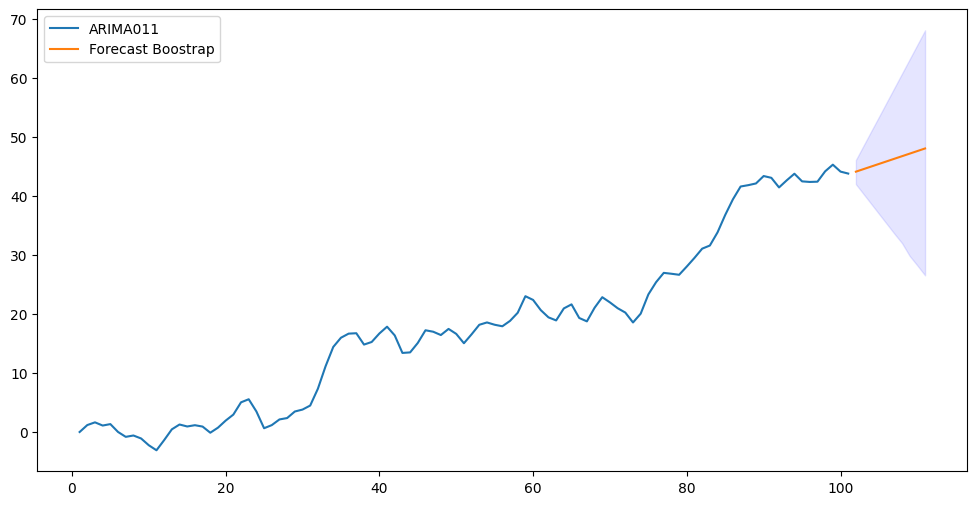

In [24]:
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(data["time"],data["ARIMA011"],label="ARIMA011")
plt.plot(x_for,preds['Point_forecast'],label="Forecast Boostrap")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

### **7. Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.